In [17]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
data = pd.read_csv("../../data/twitter-scraped-data/vaccines/processed.csv")

c:\users\kubas\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [92]:
data['search'].unique()

array(['segregacja', 'covid1984', 'nwo', 'szczepimysie', 'szczepimysię',
       'nieszczepimysię', 'segregację', 'segregacji', 'segregacją',
       'śmiertelna substancja', 'nop', 'stopnop', 'stop nop',
       'norymberga20', 'zajob', 'plandemia', 'plandemii', 'plandemie',
       'plandemią', 'niezaszczepiony', 'niezaszczepiona',
       'niezaszczepioni', 'niezaszczepieni', 'niezaszczepię',
       'nie zaszczepię', 'nie zaszczepiona', 'nie zaszczepiony',
       'nie zaszczepią', 'zaszczepię', 'zaszczepieni', 'zaszczepiona',
       'zaszczepiony', 'zaszczepią', 'szczepię', 'szczepią', 'szczepiona',
       'szczepieni', 'szczepiony', 'szczepionki', 'szczepionkom',
       'szczepionkami', 'szczepionkach', 'szczepionka',
       'stopsegregacjisanitarnej', 'stopss', 'nieszczepimy',
       'szczepionce', 'paszport covidowy', 'paszportu covidowego',
       'paszportem covidowym', 'paszporcie covidowym',
       'paszporty covidowe', 'paszportów covidowych',
       'paszportom covidowym', 'pasz

In [113]:
print(f'Liczba słów kluczowych: {len(data["search"].unique())}')

Liczba słów kluczowych: 70


**Na start jest aż 70 słów kluczowych może możemy ją jakoś zmniejszyć? Domyślam się, że nawet jeśli ktoś rozwiązywałby ankietę to byłby to problem z taką ilością pytań.**

## Najczęściej pojawiające się słowa kluczowe

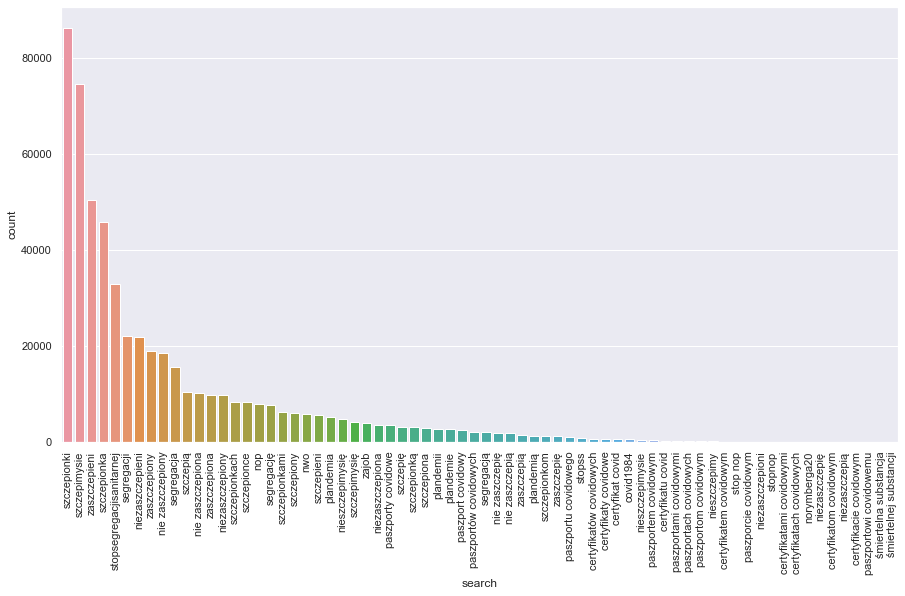

In [67]:
sns.set(rc = {'figure.figsize':(15,8)})
p = sns.countplot(x='search', data=data, order = data['search'].value_counts().index)
plt.setp(p.get_xticklabels(), rotation=90)
plt.show()

In [114]:
print(f'Liczba unikatowych tweetów: {len(data["id"].unique())}')

Liczba unikatowych tweetów: 546899


In [105]:
data_per = data.groupby(by="search").count()['id'].reset_index()
data_per['count'] = data_per['id'].apply(lambda x: int(x)/546899*100)
data_per = data_per.sort_values(by = 'count', ascending = False).drop('id', axis = 1).reset_index(drop = True)
data_per['count_cumsum'] = data_per['count'].cumsum()

In [106]:
data_per[:15]

,search,count,count_cumsum
0,szczepionki,15.793593,15.793593
1,szczepimysie,13.668154,29.461747
2,zaszczepieni,9.246131,38.707878
3,szczepionka,8.383266,47.091145
4,stopsegregacjisanitarnej,6.040421,53.131565
5,segregacji,4.042611,57.174177
6,niezaszczepieni,4.007504,61.181681
7,zaszczepiony,3.466088,64.647769
8,nie zaszczepiony,3.400079,68.047848
9,segregacja,2.860674,70.908522


**15 keywordsów pokrywa 80% zebranych danych. Ekspercko patrząc wygląda też na wmiarę zbilansowany rozkład pomiędzy słowami kluczowymi bedącymi bardziej pro vs. anty szczepionkowymi**

## Najpopularniejsze słowa kluczowe

**Popularność jest mierzona przez sumę likeów, replies i retweetów na tweecie.**

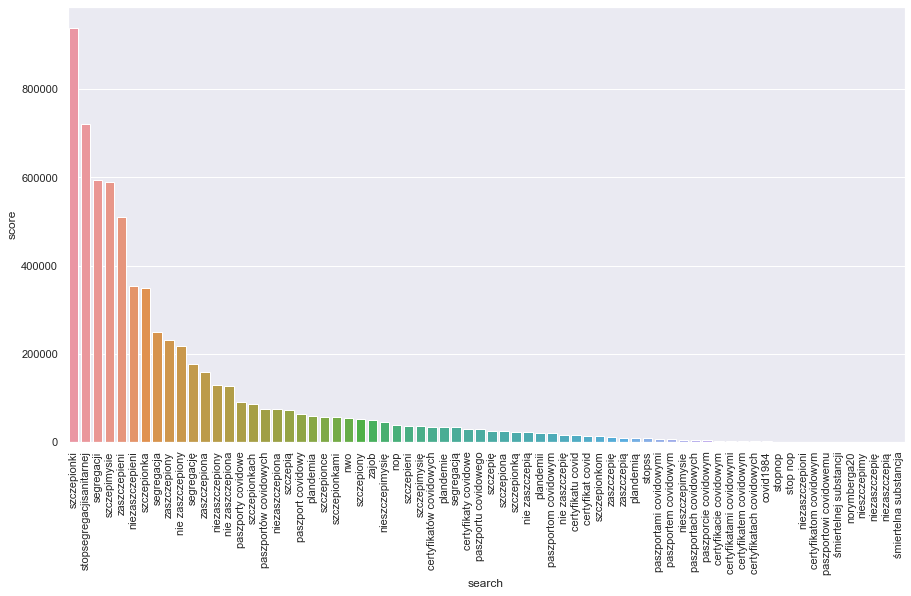

In [75]:
data_score = data.groupby(by="search").sum()['score'].reset_index().sort_values(by = "score", ascending = False)

sns.set(rc = {'figure.figsize':(15,8)})
p = sns.barplot(x='search', y = 'score', data= data_score)
plt.setp(p.get_xticklabels(), rotation=90)
plt.show()

In [115]:
print(f'Suma popularności (score): {data["score"].sum()}')

Suma popularności (score): 6747621


In [98]:
data_per = data.groupby(by="search").sum()['score'].reset_index()
data_per['score_percentage'] = data_per['score'].apply(lambda x: int(x)/6747621*100)
data_per = data_per.sort_values(by = 'score_percentage', ascending = False).reset_index(drop = True)
data_per['score_percentage_cumsum'] = data_per['score_percentage'].cumsum()

In [99]:
data_per[:15]

,index,search,score,score_percentage,score_percentage_cumsum
0,56,szczepionki,939314.0,13.920669,13.920669
1,46,stopsegregacjisanitarnej,721801.0,10.697118,24.617788
2,41,segregacji,593794.0,8.800050,33.417837
3,49,szczepimysie,589689.0,8.739213,42.157051
4,63,zaszczepieni,511257.0,7.576848,49.733899
5,17,niezaszczepieni,354587.0,5.254993,54.988892
6,53,szczepionka,350145.0,5.189162,60.178054
7,40,segregacja,249845.0,3.702712,63.880766
8,65,zaszczepiony,231376.0,3.429001,67.309767
9,11,nie zaszczepiony,218344.0,3.235866,70.545634


**Tutaj sytuacja wygląda podobnie 15 keywordsów odpowiada za 80% sumy popularności**